In [1]:
import os
from pathlib import Path
import torch

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

device = torch.device('cuda')

In [2]:
import io
import contextlib
import cv2

In [3]:
from yolort.data import COCODetectionDataModule

In [4]:
from yolort.utils.image_utils import color_list, plot_one_box

In [5]:
from yolort.utils import cv2_imshow

In [6]:
from yolort.utils.image_utils import load_names
labels = load_names('notebooks/assets/coco.names')

In [7]:
def to_numpy(tensor):
    if tensor.requires_grad:
        return tensor.detach().cpu().numpy()
    else:
        return tensor.cpu().numpy()

In [8]:
COLORS = color_list()

## Setup the coco128 dataset and dataloader for testing

In [9]:
# Acquire the images and labels from the coco128 dataset
data_path = Path('data-bin')
coco128_dirname = 'coco128'
coco128_path = data_path / coco128_dirname
image_root = coco128_path / 'images' / 'train2017'
annotation_path = coco128_path / 'annotations'

# anno_api = COCO(annotation_file)

In [10]:
with contextlib.redirect_stdout(io.StringIO()):
    datamodule = COCODetectionDataModule(
        image_root,
        annotations_path=annotation_path,
        batch_size=1,
    )

In [11]:
test_dataloader = iter(datamodule.train_dataloader(batch_size=16))

In [12]:
images, targets = next(test_dataloader)

inputs = list(map(to_numpy, images))

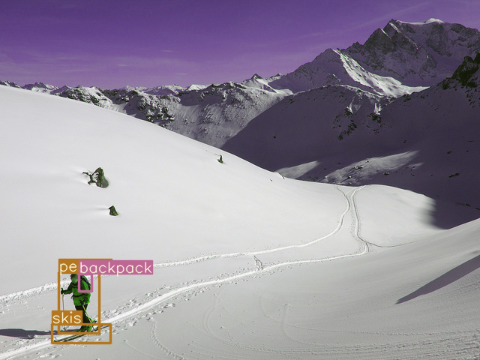

In [13]:
idx = 12
img_raw = (inputs[idx].transpose(1, 2, 0) * 255).clip(0, 255).astype('uint8')
img_raw = cv2.cvtColor(img_raw, cv2.COLOR_RGB2BGR)

for box, label in zip(targets[idx]['boxes'].tolist(), targets[idx]['labels'].tolist()):
    img_raw = plot_one_box(box, img_raw, color=COLORS[label % len(COLORS)], label=labels[label])

cv2_imshow(img_raw, imshow_scale=0.75)